In [19]:
import scanpy as sc
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import my_functions as mf # to fetch my helper functions
import importlib
importlib.reload(mf)

<module 'my_functions' from '/data/projects/zeba/MY_PROJECTS/240130_Xenium_ANCA_SLE_GBM/xenium-cgn-zeba-may25/xenium-cgn/notebooks/13_Clinical_Correlation_Clusters/my_functions.py'>

In [20]:
import os
out_dir = "output"
os.makedirs(out_dir, exist_ok=True)

## Clinical Data

In [17]:
df_clinical_values = pd.read_csv('./output/ClinicalData_medianPC1.csv')
df_clinical_values

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,disease,ARRscore_SLEclass,Biopsy_ID,Total_gloms_on_biopsy,Median_PC1
0,X6,81,männlich,0.010,1.20,55.000000,ANCA,ARRS low (0/11),X6,5,-0.181733
1,X3,55,weiblich,0.440,1.60,35.000000,ANCA,ARRS medium (2/11),X3,10,0.273051
2,X4,59,männlich,1.200,2.40,28.260000,ANCA,ARRS medium (2/11),X4,7,-0.102901
3,X17,72,weiblich,0.425,1.10,49.930000,ANCA,ARRS low (0/11),X17,14,0.365794
4,X25,52,männlich,3.250,3.70,17.590000,ANCA,ARRS high (8/11),X25,5,0.754072
5,X27,46,männlich,0.760,4.70,13.740000,ANCA,ARRS medium (5/11),X27,15,0.959444
6,X18,43,männlich,NaN,3.30,21.520000,ANCA,ARRS medium (2/11),X18,5,0.673121
7,X33,65,männlich,NaN,NaN,NaN,ANCA,na,X33,10,0.171400
8,X28,47,männlich,NaN,2.58,28.170000,ANCA,ARRS medium (2/11),X28,4,0.406449
9,X50,24,weiblich,NaN,0.63,125.070000,ANCA,ARRS low (0/11),X50,5,0.409695


In [4]:
df_clinical_values.drop(columns=["Unnamed: 0", "Total_gloms_on_biopsy"], inplace=True, errors="ignore")

## For all biopsies

In [5]:
df_clinical_values

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,disease,ARRscore_SLEclass,Biopsy_ID,Median_PC1
0,X6,81,männlich,0.010,1.20,55.000000,ANCA,ARRS low (0/11),X6,-0.181733
1,X3,55,weiblich,0.440,1.60,35.000000,ANCA,ARRS medium (2/11),X3,0.273051
2,X4,59,männlich,1.200,2.40,28.260000,ANCA,ARRS medium (2/11),X4,-0.102901
3,X17,72,weiblich,0.425,1.10,49.930000,ANCA,ARRS low (0/11),X17,0.365794
4,X25,52,männlich,3.250,3.70,17.590000,ANCA,ARRS high (8/11),X25,0.754072
5,X27,46,männlich,0.760,4.70,13.740000,ANCA,ARRS medium (5/11),X27,0.959444
6,X18,43,männlich,NaN,3.30,21.520000,ANCA,ARRS medium (2/11),X18,0.673121
7,X33,65,männlich,NaN,NaN,NaN,ANCA,na,X33,0.171400
8,X28,47,männlich,NaN,2.58,28.170000,ANCA,ARRS medium (2/11),X28,0.406449
9,X50,24,weiblich,NaN,0.63,125.070000,ANCA,ARRS low (0/11),X50,0.409695


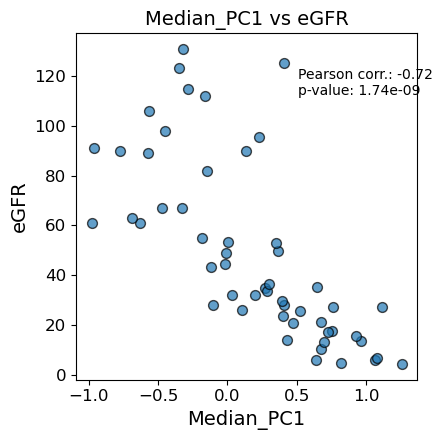

In [6]:
mf.plot_correlation_scatter(
    df_clinical_values, 
    'Median_PC1', 
    'eGFR', 
    method='pearson'
)

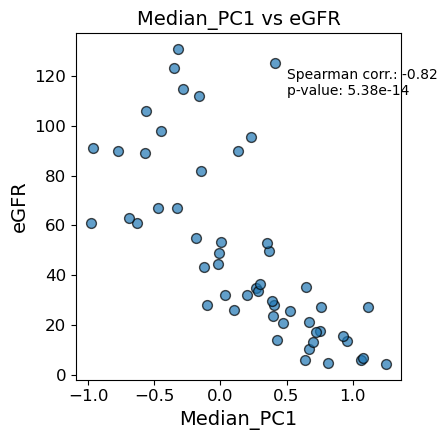

In [7]:
mf.plot_correlation_scatter(
    df_clinical_values, 
    'Median_PC1', 
    'eGFR', 
    method='spearman',
    label_pos=[0.65, 0.9],
    figsize=(4.5, 4.5)
)

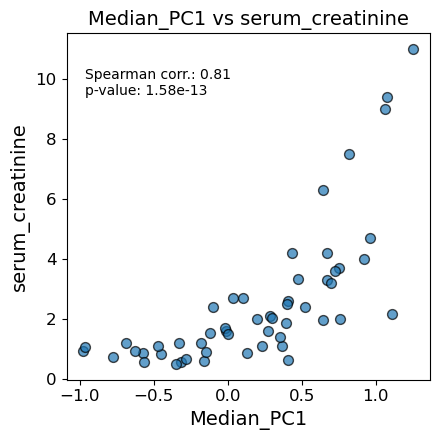

In [8]:
mf.plot_correlation_scatter(
    df_clinical_values, 
    'Median_PC1', 
    'serum_creatinine', 
     label_pos=[0.05, 0.9],
    method='spearman'
)

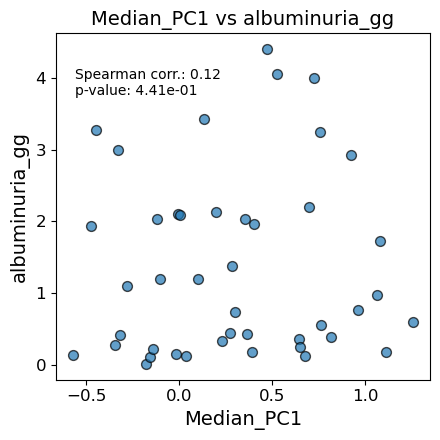

In [9]:
mf.plot_correlation_scatter(
    df_clinical_values, 
    'Median_PC1', 
    'albuminuria_gg', 
    #label_pos=[0.05, 0.9],
    label_pos=[0.05, 0.9],
    method='spearman'
)

## For only patients

In [10]:
cGN=["ANCA", "SLE", "GBM"]
only_patients=df_clinical_values[df_clinical_values["disease"].isin(cGN)]

## For only ANCA patients : correlation with ARR score

In [11]:
ANCA_patients=df_clinical_values[df_clinical_values["disease"] == 'ANCA']

In [12]:
ANCA_patients

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,disease,ARRscore_SLEclass,Biopsy_ID,Median_PC1
0,X6,81,männlich,0.010,1.20,55.000000,ANCA,ARRS low (0/11),X6,-0.181733
1,X3,55,weiblich,0.440,1.60,35.000000,ANCA,ARRS medium (2/11),X3,0.273051
2,X4,59,männlich,1.200,2.40,28.260000,ANCA,ARRS medium (2/11),X4,-0.102901
3,X17,72,weiblich,0.425,1.10,49.930000,ANCA,ARRS low (0/11),X17,0.365794
4,X25,52,männlich,3.250,3.70,17.590000,ANCA,ARRS high (8/11),X25,0.754072
5,X27,46,männlich,0.760,4.70,13.740000,ANCA,ARRS medium (5/11),X27,0.959444
6,X18,43,männlich,NaN,3.30,21.520000,ANCA,ARRS medium (2/11),X18,0.673121
7,X33,65,männlich,NaN,NaN,NaN,ANCA,na,X33,0.171400
8,X28,47,männlich,NaN,2.58,28.170000,ANCA,ARRS medium (2/11),X28,0.406449
9,X50,24,weiblich,NaN,0.63,125.070000,ANCA,ARRS low (0/11),X50,0.409695


In [13]:
ANCA_patients = ANCA_patients.copy()

ANCA_patients['ARRscore'] = ANCA_patients['ARRscore_SLEclass'].str.extract(r'\((\d+)/')

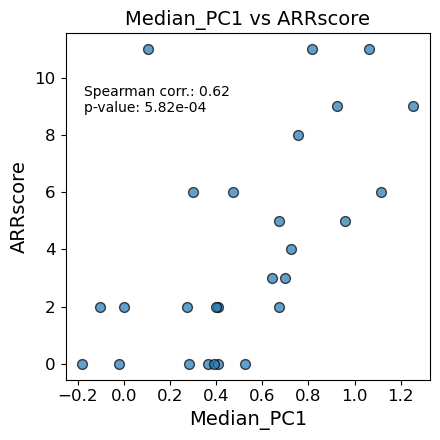

In [14]:
mf.plot_correlation_scatter(
    ANCA_patients, 
    'Median_PC1', 
    'ARRscore', 
    #label_pos=[0.6, 0.15],
    label_pos=[0.05, 0.85],
    method='spearman'
)

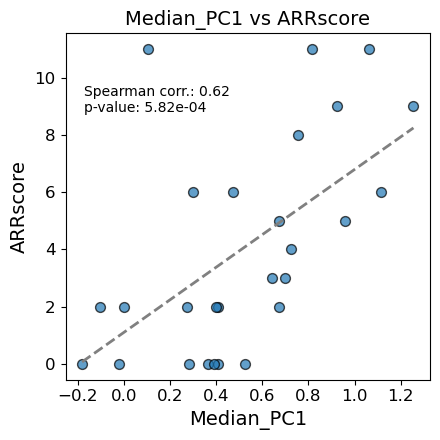

In [21]:
mf.plot_correlation_scatter(
    ANCA_patients, 
    'Median_PC1', 
    'ARRscore', 
    #label_pos=[0.6, 0.15],
    label_pos=[0.05, 0.85],
    method='spearman',
    best_fit=True
)